In [12]:
import pandas as pd
import time
import re 
import seaborn as sns
import numpy as np

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [13]:
def vader_by_line(lyrics):
    split = lyrics.splitlines()
    lines = list(filter(None, split))
    scores = []
    for line in lines:
        score = analyser.polarity_scores(line)
        scores.append(score['compound'])
    scores = list(filter(lambda x: x != 0.0, scores))
    if len(scores) == 0:
        return np.nan
    return np.mean(scores)

In [14]:
song_info = pd.read_csv('../data/lyrics/song_info.txt')
song_info = song_info[song_info['lang'] == 'en']
song_info = song_info[['song_id', 'title', 'artist', 'lyrics', 'audio_features']]
song_info.head()

,song_id,title,artist,lyrics,audio_features
37,6cbqh8woSu03Vj8s1PCK9C,Step Up,Macka B,"Uh\r\nHere we go, that’s right\r\nUh huh uh hu...","{'danceability': 0.895, 'energy': 0.752, 'key'..."
85,3xIHePHJbOEtnzlwAOoCtz,Fulton St.,Leschea,He be rollin' in his jeep\r\nCruisin' down on ...,"{'danceability': 0.736, 'energy': 0.51, 'key':..."
123,3zb1zBmkrPF6VW8RhlSYA1,Why U Bullshittin'?,Suga Free,"So pay attention, babe\r\nPay attention\r\nOur...","{'danceability': 0.839, 'energy': 0.706, 'key'..."
124,6A8KuRrV72ZP4MneZRCsSm,Rude,03 Greedo,[Chorus]\r\nI don't mean to be rude\r\nI don't...,"{'danceability': 0.585, 'energy': 0.65, 'key':..."
125,7hphy8rtxpYshs3UzDZTzN,Baby You Got It,Brenton Wood,I run after you like a fool would do\r\nBut ma...,"{'danceability': 0.787, 'energy': 0.708, 'key'..."


In [15]:
reg = "[\(\[].*?[\)\]]"
print('Original length:', len(song_info))
song_info['lyrics'] = song_info['lyrics'].str.replace(reg, '')
song_info = song_info[song_info['lyrics'] != '']
print('Cleaned length:', len(song_info))

Original length: 18114
Cleaned length: 18100


In [16]:
print('Obtaining VADER scores for', len(song_info), 'songs.')

Obtaining VADER scores for 18100 songs.


In [17]:
song_info['vader_score'] = song_info['lyrics'].progress_apply(lambda x: vader_by_line(x))

In [18]:
song_info[song_info['vader_score'].isnull()]

,song_id,title,artist,lyrics,audio_features,vader_score
1479,5lezaZXRyEsGBgKyKaGRZA,Run Baby Run,Caspar Babypants,Run baby run\r\nRun run run run run\r\nJump ba...,"{'danceability': 0.678, 'energy': 0.317, 'key'...",NaN
1517,4n6z0yh2ZpoGh0RNyGVu52,One Day They'll Know (ODESZA Remix),Pretty Lights,"\r\n\r\nOne day, one day at a time\r\nOne day,...","{'danceability': 0.465, 'energy': 0.714, 'key'...",NaN
1708,56GUqVnmvP28btAuvxXHPS,Best Friends,Cymbol,Coming soon...,"{'danceability': 0.482, 'energy': 0.458, 'key'...",NaN
1715,3mnffmhbK8wnQAawWX6LmW,Burning,Kora,One day when I get my act right I will choose ...,"{'danceability': 0.841, 'energy': 0.521, 'key'...",NaN
1747,2ZWVYAyeCSg1KRQvcWnHqO,Highlights,DJ Marky,"I saw red, I saw green\r\nI think I saw what t...","{'danceability': 0.53, 'energy': 0.395, 'key':...",NaN
1773,5wbiZhDQws4Gc0EVac8qkw,My Breakup Anthem,Caitlyn Shadbolt,*Lyrics will be added shortly,"{'danceability': 0.561, 'energy': 0.685, 'key'...",NaN
2246,5lbG6X59uhVbW0QLVq3vqb,Gallon - Cassian Remix,Mr Sanka,\r\nI don't remember\r\nI don't remember\r\nI ...,"{'danceability': 0.73, 'energy': 0.859, 'key':...",NaN
2326,2xoADhNgQoRRls6lNCaIYd,Parked out by the Lake,Dean Summerwind,I'm still parked out by the lake\r\nEighty mil...,"{'danceability': 0.561, 'energy': 0.681, 'key'...",NaN
2351,5GPfbKNCmJPqjSRjfGwCep,Your Day Will Come,Son Lux,Close your eyes\r\nSwallow the sun\r\nYou have...,"{'danceability': 0.303, 'energy': 0.356, 'key'...",NaN
2612,5Pyuku4UaVuhttrt5QvEjQ,Ooo Ohh,Daniel Wesley,"Ooh oh you can't look back girl,\r\nGonna catc...","{'danceability': 0.696, 'energy': 0.665, 'key'...",NaN


In [19]:
vader_df = song_info[~song_info['vader_score'].isnull()]
vader_df[['song_id', 'vader_score']].to_csv(path_or_buf='../data/vader_scores.txt', index=False)

In [20]:
vader_df['vader_score'].describe()

count    17940.000000
mean         0.082988
std          0.229832
min         -0.982100
25%         -0.078144
50%          0.084009
75%          0.247233
max          0.998900
Name: vader_score, dtype: float64

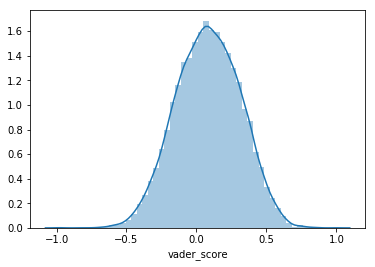

In [21]:
sns.distplot(vader_df['vader_score'])

In [27]:
vader_df.loc[vader_df['vader_score'].idxmax()]

song_id                                      2J6zz86oGWSBiRwn5T26Kw
title                               For the Love of You, Pts. 1 & 2
artist                                           The Isley Brothers
lyrics            THE ISLEY BROTHERS\r\nDrifting on a memory Ain...
audio_features    {'danceability': 0.681, 'energy': 0.263, 'key'...
vader_score                                                  0.9989
Name: 12472, dtype: object

In [28]:
vader_df.loc[vader_df['vader_score'].idxmin()]

song_id                                      1dgueNPJ5SCuhSDxSjS5ps
title                                           Trilla Than A B***h
artist                                                       Webbie
lyrics            "\n\nPants low, afro, no shirt, blowing purp, ...
audio_features    {'danceability': 0.692, 'energy': 0.708, 'key'...
vader_score                                                 -0.9821
Name: 36027, dtype: object